<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml08_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

(주의) 분류 알고리즘

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 셋

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


물고기의 모든 특성을 사용한 이진 분류(Bream vs Smelt)

In [4]:
df = fish[fish.Species.isin(['Bream', 'Smelt'])]

In [5]:
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [6]:
df.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [7]:
x = df[df.columns[1:]].values  # 특성 배열
y = df['Species'].values  # 타겟 배열

## 훈련/테스트 나누기

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Logistic Regresseion

## 모델 훈련

In [9]:
# 표준화 + Logistic 분류 -> 파이프라인
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('clf', LogisticRegression(random_state=42))])

In [10]:
# ML 모델 훈련
pipe.fit(X=x_train, y=y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])

In [11]:
pipe['scaler'].mean_  #> 훈련 셋 물고기 5개 특성(we, l, d, h, wi)의 평균

array([441.98333333,  26.93333333,  31.01944444,  11.50641389,
         4.26155   ])

In [12]:
pipe['scaler'].var_  #> 훈련 셋 물고기 5개 특성의 분산

array([1.06023830e+05, 1.01836667e+02, 1.41404900e+02, 3.66338767e+01,
       3.76707020e+00])

In [13]:
pipe['clf'].coef_  #> 물고기 5개 특성 변수들 앞에 곱해주는 계수들(기울기)

array([[-0.55506377, -0.7878406 , -0.82200554, -0.85621658, -0.80176239]])

In [14]:
pipe['clf'].intercept_  #> 선형회귀식의 절편

array([-2.70008196])

## 모델 평가

### 훈련 셋 평가

In [15]:
# 훈련 셋 예측값
train_pred = pipe.predict(X=x_train)
train_pred

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [16]:
y_train  # 훈련 셋 실젯값

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [17]:
train_pred_prob = pipe.predict_proba(X=x_train)
train_pred_prob[:7]
#> (n_smaples, 2) shape의 2차원 배열
#> [도미(Bream)일 확률, 빙어(Smelt)일 확률]을 아이템으로 갖는 2차원 배열.

array([[9.97290326e-01, 2.70967369e-03],
       [9.58966545e-01, 4.10334547e-02],
       [4.27098857e-02, 9.57290114e-01],
       [9.84081674e-01, 1.59183261e-02],
       [4.23755420e-02, 9.57624458e-01],
       [9.99167839e-01, 8.32161290e-04],
       [4.52187270e-02, 9.54781273e-01]])

In [18]:
# 훈련 셋 혼동 행렬
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[26,  0],
       [ 0, 10]])

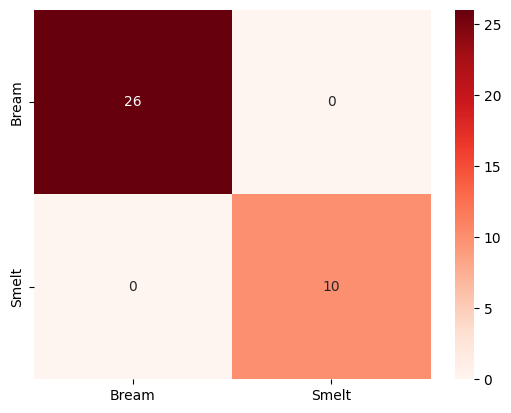

In [19]:
labels= ['Bream', 'Smelt']
sns.heatmap(data=cm_train, cmap='Reds', annot=True,
            xticklabels=labels, yticklabels=labels)
plt.show()

### 테스트 셋 평가

In [20]:
# 테스트 셋 예측 확률들
test_pred_prob = pipe.predict_proba(X=x_test)
test_pred_prob[:6]

array([[9.97327377e-01, 2.67262321e-03],
       [9.94421467e-01, 5.57853296e-03],
       [9.99430914e-01, 5.69085665e-04],
       [1.02243774e-01, 8.97756226e-01],
       [5.42736495e-02, 9.45726351e-01],
       [9.93085855e-01, 6.91414509e-03]])

In [21]:
# 테스트 셋 예측값
test_pred = pipe.predict(X=x_test)
test_pred[:6]

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream'], dtype=object)

In [22]:
# 테스트 셋 혼동 행렬
cm_test = confusion_matrix(y_true=y_test, y_pred=test_pred)
cm_test

array([[9, 0],
       [0, 4]])

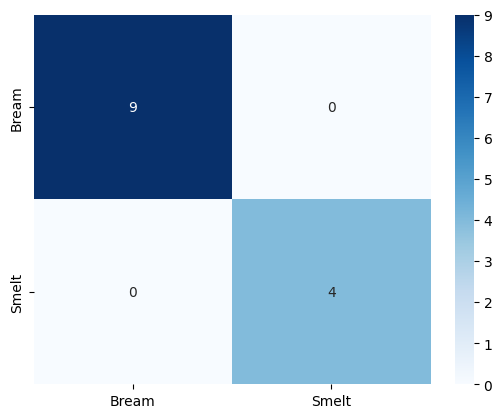

In [23]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True,
            xticklabels=labels, yticklabels=labels)
plt.show()

# Sigmoid(Logistic) 함수

$$
\phi(z) = \dfrac{e^z}{e^z + 1} = \dfrac{1}{1 + e^{-z}}
$$

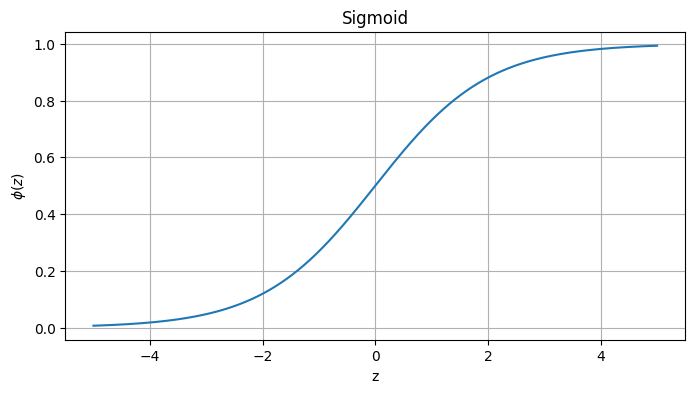

In [26]:
z = np.arange(-5, 5, 0.0001)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8, 4))
plt.plot(z, sigmoid)
plt.grid()
plt.title('Sigmoid')
plt.xlabel('z')
plt.ylabel(r'$\phi(z)$')
plt.show()

**Logistic Regression**

*   선형 회귀
$$
z_i = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + \cdots = w_0 + \sum_j x_{ij} \cdot w_j
$$

*   선형 회귀 공식으로 계산된 결과를 logistic 함수의 argument로 전달
$$
p_i = \phi(z_i) = \dfrac{1}{1 + e^{-z}}
    = \dfrac{1}{1 + exp(-(w_0 + \sum_j x_{ij} \cdot w_j))}
$$

*   Sigmoid(Logistic) 함수의 리턴값은 항상 0 ~ 1이므로, Logistic Regression은 logistic 함수의 리턴값을 양성이 될 확률로 해석.
*   Logistic Regression에서 훈련(학습)이란 훈련 데이터로부터 아래의 비용 함수를 최소화하는 파라미터들($w_0$, $w_1$, ...)을 찾는 과정.

*   다중 클래스 분류에스는 softmax 함수를 클래스 $i$가 될 확률로 정의.
$$
\mathrm{softmax}{\mathbf(z)}_i = \dfrac{e^{z_i}}{\sum_{j=1}^{k} e^{z_j}}, \quad i = 1, \dots, k
$$


**비용(손실) 함수(cost/loss function)**

*   이진 분류에서는 손실 함수 log loss가 최소가 되는 계수들을 찾는 것이 목적.
*   Logistic loss function(**log loss**)

>>   $ L = -[y \log{p} + (1-y) \log{(1-p)}] $

>>   $ J(W) = - \dfrac{1}{N} \sum_{i=1}^{N} [y^{(i)} \log({p}^{(i)}) + (1-y^{(i)}) \log(1 - {p}^{(i)})] $

>>   N: the number of samples

*   다중 클래스 분류에서는 비용 함수 크로스 엔트로피가 최소가 되는 계수들을 찾는 것이 목적.
*   __Cross entropy__ cost function

>>   $ J(W) = - \dfrac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{m} y_{k}^{(i)} \log({p}_{k}^{(i)}) $

>>   N: the number of samples

>>   m: the number of classes

[]

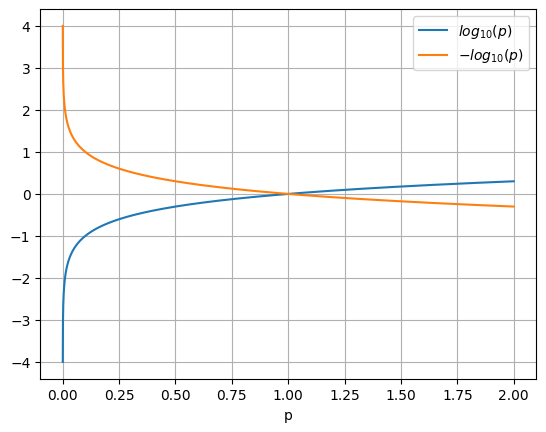

In [28]:
# 상용 로그(common log, 밑수가 10인 로그) 시각화
p = np.arange(0.0001, 2.0, 0.0001)
y = np.log10(p)

plt.plot(p, y, label=r'$log_{10}(p)$')
plt.plot(p, -y, label=r'$-log_{10}(p)$')

plt.legend()
plt.grid()
plt.xlabel('p')
plt.plot()

# 다중 클래스 분류

물고기 종류(7개 클래스: Perch, ..., Whitefish)를 여러가지 특성들(5개 특성: Weight, ..., Width)로 예측

In [30]:
fish.Species.value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


In [33]:
x = fish[fish.columns[1:]].values  # 특성 배열
y = fish.Species.values # 타겟 배열

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [35]:
x_train.shape

(119, 5)

In [36]:
x_test.shape

(40, 5)

In [38]:
pd.Series(y_train).value_counts()

,count
Perch,42
Bream,26
Roach,15
Pike,13
Smelt,10
Parkki,8
Whitefish,5


In [39]:
pd.Series(y_train).value_counts(normalize=True)

,proportion
Perch,0.352941
Bream,0.218487
Roach,0.126050
Pike,0.109244
Smelt,0.084034
Parkki,0.067227
Whitefish,0.042017


In [40]:
pd.Series(y_test).value_counts(normalize=True)

,proportion
Perch,0.350
Bream,0.225
Roach,0.125
Smelt,0.100
Pike,0.100
Parkki,0.075
Whitefish,0.025


In [41]:
# Pipeline 객체(StandardScaler + LogsiticRegression) 생성
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('clf', LogisticRegression(random_state=42))])

In [42]:
# ML 모델 훈련
pipe.fit(X=x_train, y=y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])

In [44]:
# 훈련 셋 예측확률
train_pred_prob = pipe.predict_proba(X=x_train)
train_pred_prob[:6]

array([[7.69459216e-03, 4.65891260e-02, 6.11409230e-01, 1.96377253e-02,
        2.68956206e-01, 1.58925303e-02, 2.98205899e-02],
       [1.74497319e-02, 2.37894455e-02, 6.88918691e-01, 3.54945128e-02,
        1.86625643e-01, 1.90536994e-03, 4.58166054e-02],
       [6.06586345e-01, 8.15692180e-02, 1.30261955e-01, 1.44902276e-02,
        8.62462750e-02, 1.11198352e-04, 8.07347807e-02],
       [9.84491032e-01, 1.66196705e-03, 2.09357864e-03, 6.99558441e-04,
        4.65703844e-04, 1.06882451e-08, 1.05881493e-02],
       [6.93595028e-03, 6.52758853e-02, 5.81485559e-01, 1.38664971e-02,
        2.80588739e-01, 2.62452298e-02, 2.56021393e-02],
       [1.11092755e-02, 2.90233559e-02, 6.73042541e-01, 2.90797119e-02,
        2.16578254e-01, 4.57139421e-03, 3.65954673e-02]])

In [45]:
train_pred = pipe.predict(X=x_train)
train_pred[:6]

array(['Perch', 'Perch', 'Bream', 'Bream', 'Perch', 'Perch'], dtype=object)

In [46]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[26,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  1,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0, 13,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  5,  0,  0,  0,  0]])

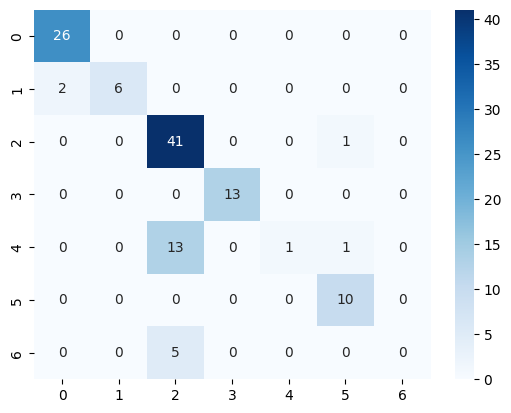

In [47]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True)
plt.show()

In [50]:
pipe['scaler'].mean_

array([405.17731092,  28.78151261,  31.60252101,   9.0920958 ,
         4.50740672])

In [51]:
pipe['scaler'].var_

array([1.13843872e+05, 1.05366213e+02, 1.22528985e+02, 1.77581956e+01,
       2.79467085e+00])

In [53]:
pipe['clf'].coef_  #> shape: (7, 5) = (n_classes, n_features)

array([[-0.14956567, -0.16160018,  0.64704628,  2.91976817, -0.30628584],
       [-0.37933795, -0.73258923, -0.75556741,  1.84246802, -0.73210122],
       [ 1.1036223 ,  0.3458353 , -1.28667278, -1.81771624,  1.86188303],
       [-0.07518691,  1.75355305,  1.72329844, -1.24848385, -0.76182413],
       [-0.84841538, -0.44129897,  0.3461493 , -0.41833697,  0.6367109 ],
       [-0.34601387, -0.72616172, -0.72574227, -1.29725803, -1.49869005],
       [ 0.69489747, -0.03773826,  0.05148844,  0.0195589 ,  0.8003073 ]])

In [54]:
pipe['clf'].intercept_  # shape: (7,) = (n_classes)

array([ 0.50249313, -0.15455355,  2.23560206, -0.0249976 ,  0.97610774,
       -3.97678616,  0.44213438])

In [55]:
pipe.score(X=x_train, y=y_train)  # 훈련 셋 정확도

0.8151260504201681

In [56]:
# 테스트 셋 예측값
test_pred = pipe.predict(X=x_test)

In [57]:
cm_test = confusion_matrix(y_true=y_test, y_pred=test_pred)
cm_test

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  1,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  1,  0,  0,  0,  0]])

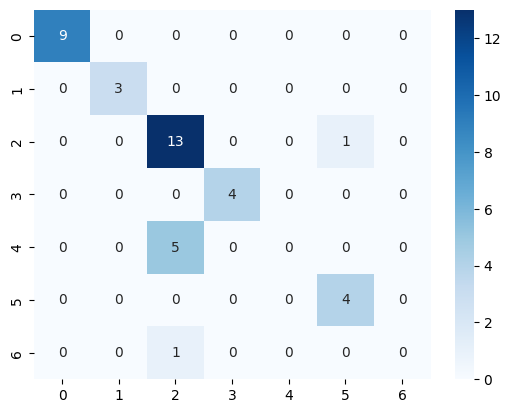

In [58]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True)
plt.show()

In [59]:
pipe.score(X=x_test, y=y_test)  # 테스트 셋 정확도

0.825